<a href="https://colab.research.google.com/github/ignaciomz/CH_IM_61140/blob/main/WineQuality_Parte1_Mart%C3%ADnez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de la Calidad del Vino**: *Un Estudio Basado en Datos*

 En el presente estudio se realiza un análisis exhaustivo de la calidad del vino utilizando un conjunto de datos obtenido de Kaggle. Este dataset incluye diversas variables cuantitativas que son fundamentales para la evaluación de las características físicas y químicas del vino. Las variables consideradas en este análisis son: acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad pH, sulfatos, alcohol y calidad, junto con un identificador único (Id) para cada muestra.

 El objetivo principal de este análisis es determinar cómo las diferentes propiedades químicas del vino influyen en su calidad final, que está representada por una variable categórica en el dataset.

 Este análisis proporciona una comprensión detallada de cómo las propiedades químicas influyen en la calidad del vino. Los resultados obtenidos no solo son útiles para los productores de vino en la optimización de sus procesos, sino también para los consumidores y expertos que buscan entender mejor las características que definen un vino de alta calidad. Las técnicas de machine learning aplicadas en este estudio demuestran ser herramientas valiosas para la predicción y evaluación de la calidad del vino, abriendo puertas a futuras investigaciones y aplicaciones en la enología. Además, se exploran técnicas de análisis exploratorio y visualización de datos para identificar patrones y relaciones significativas entre las variables, facilitando una interpretación más profunda de los factores determinantes de la calidad del vino.

# **GLOSARIO**

 **Fixed Acidity (Acidez Fija)**: Representa la cantidad total de ácidos no volátiles presentes en el vino, como el ácido tartárico y el ácido málico. Contribuye a la estructura y estabilidad del vino.

 **Volatile Acidity (Acidez Volátil)**: Indica la concentración de ácidos volátiles, principalmente el ácido acético, en el vino. Altos niveles de acidez volátil pueden dar lugar a aromas y sabores desagradables, como el vinagre.

 **Citric Acid (Ácido Cítrico):** Es un ácido orgánico que se encuentra de forma natural en muchas frutas cítricas. En el vino, puede contribuir a la acidez total y proporcionar un sabor fresco y cítrico.

 **Residual Sugar (Azúcar Residual)**: Es la cantidad de azúcar que permanece sin fermentar en el vino después del proceso de fermentación. Contribuye al cuerpo, dulzura y equilibrio del vino.

 **Chlorides (Cloruros)**: Representa la concentración de cloruros en el vino, que puede provenir tanto de la uva como del proceso de vinificación. Puede afectar el sabor y la percepción de la acidez del vino.

 **Free Sulfur Dioxide (Dióxido de Azufre Libre)**: Es una forma de dióxido de azufre (SO2) que actúa como antioxidante y conservante en el vino. Ayuda a prevenir la oxidación y el crecimiento de microorganismos no deseados.

 **Total Sulfur Dioxide (Dióxido de Azufre Total)**: Representa la cantidad total de dióxido de azufre (libre más unido) presente en el vino. Se utiliza como medida de la estabilidad y conservación del vino.

 **Density (Densidad)**: Indica la densidad del vino, generalmente medida en g/ml. Puede estar relacionada con el contenido de azúcar y alcohol del vino, así como con su cuerpo y viscosidad.

 **pH:** Es una medida de la acidez o alcalinidad del vino en una escala de 0 a 14, donde 7 es neutro. Un pH más bajo indica mayor acidez, mientras que un pH más alto indica menor acidez.

 **Sulphates (Sulfatos)**: Representa la concentración de sulfatos en el vino, que pueden provenir de aditivos como el metabisulfito de potasio. Se utilizan como conservantes y antioxidantes en el vino.

 **Alcohol**: Indica el contenido de alcohol en volumen (% ABV) del vino. Afecta el cuerpo, el sabor y la sensación de calor en el vino.

 **Quality (Calidad)**: Es una medida subjetiva de la calidad percibida del vino, generalmente evaluada por catadores o expertos enológicos. Puede basarse en múltiples factores, incluidos el aroma, sabor, textura y equilibrio del vino.


# **Preguntas de Investigación**

1. ¿Existe una relación significativa entre el contenido de alcohol y la calidad del vino?
2. ¿Cómo afecta la acidez volátil y el pH del vino en conjunto a la calidad del vino?
3. ¿Qué combinación de propiedades químicas se asocia más comúnmente con vinos de alta calidad?

# **Hipótesis de Investigación**

 Las propiedades químicas del vino, como el contenido de alcohol, la acidez volátil, y el pH, tienen una influencia significativa y predecible en la calidad del vino.

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/ignaciomz/CH_IM_61140/main/WineQT.csv"
qw = pd.read_csv(url, sep=";")

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
qw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
qw.alcohol.describe()

count     1143
unique      61
top        9.5
freq        92
Name: alcohol, dtype: object

In [6]:



qw = qw[pd.to_numeric(qw['alcohol'], errors='coerce').notnull()]
qw['alcohol'] = qw['alcohol'].astype(float)
qw.groupby('quality')['alcohol'].mean()
media_alcohol = qw.groupby('quality')['alcohol'].mean()
media_alcohol

<ipython-input-6-8b81f3b76105>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qw['alcohol'] = qw['alcohol'].astype(float)


quality
3     9.691667
4    10.260606
5     9.902277
6    10.660262
7    11.467958
8    11.937500
Name: alcohol, dtype: float64

<ipython-input-7-2a6cb486c173>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=qw, palette='Purples')


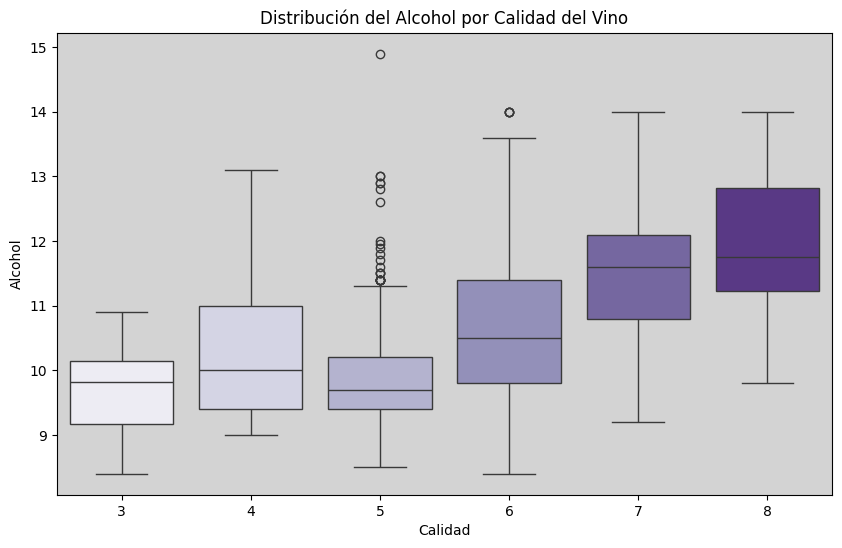

In [7]:
#Para ayudar a comprender la distribución de los valores globales de alcohol según la calidad del vino,
#realicé un boxplot.
#Podemos observar mejor su distribución apreciando los valores outliers.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
sns.boxplot(x='quality', y='alcohol', data=qw, palette='Purples')
plt.xlabel('Calidad')
plt.ylabel('Alcohol')
plt.title('Distribución del Alcohol por Calidad del Vino')
plt.show()

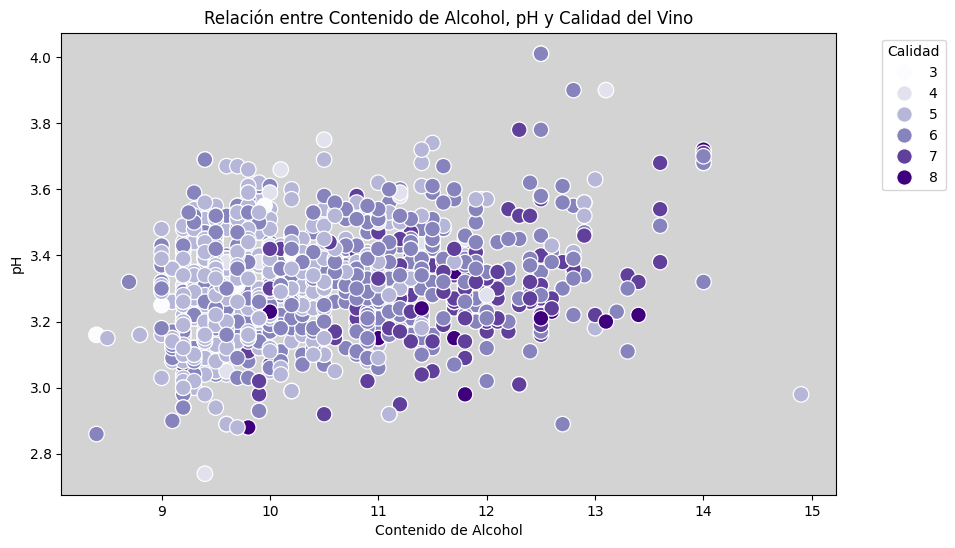

In [8]:

#Aqui, decidí ir mas adelante, y combinar el contenido de alcohol y el pH segun la calidad del vino.
#Podemos observar, que la mayoría de los vinos de mayor calidad, se encuentra entre los valores de cantidad de alcohol entre 11 y 13.
#Y un pH medio entre los valores de 3.0 y 3.6

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
scatter = sns.scatterplot(x='alcohol', y='pH', hue='quality', palette='Purples', data=qw, s=125)
plt.xlabel('Contenido de Alcohol')
plt.ylabel('pH')
plt.title('Relación entre Contenido de Alcohol, pH y Calidad del Vino')
plt.legend(title='Calidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

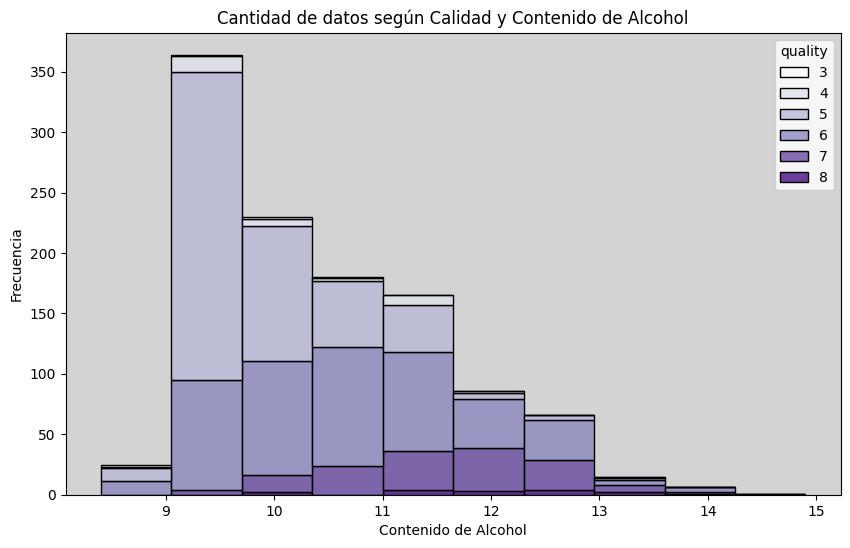

In [9]:
#A raíz de las conclusiones anteriores, se me ocurrió observar, como era la distribución en mi dataframe, de cantidad de valores registrados.
#Así vemos, que tengo mayores valores registrados de vino con una calidad media-baja y menor contenido de alcohol.


plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
sns.histplot(data=qw, x='alcohol', hue='quality', palette='Purples', multiple='stack', bins=10)
plt.xlabel('Contenido de Alcohol')
plt.ylabel('Frecuencia')
plt.title('Cantidad de datos según Calidad y Contenido de Alcohol')
plt.show()

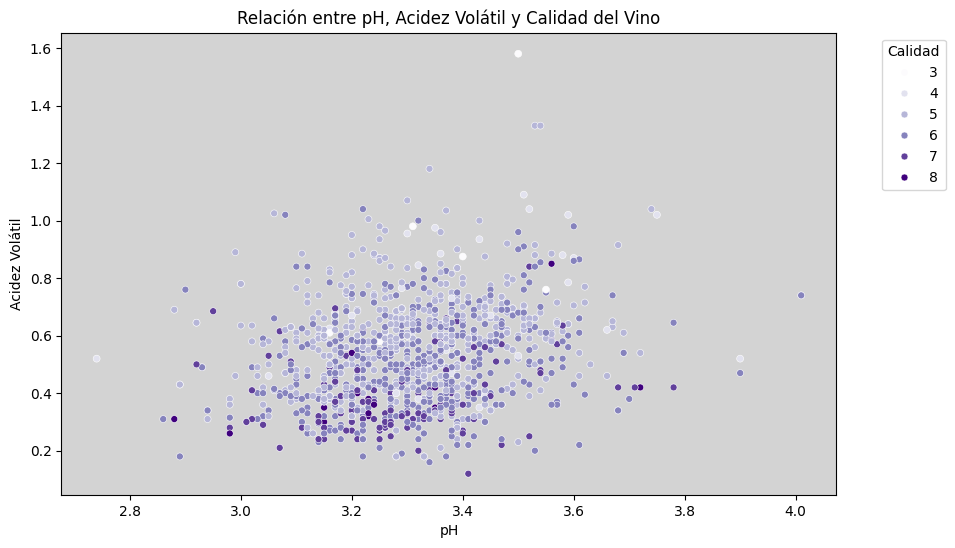

In [10]:
#Analizando lo anterior, y tomando como punto de partida el pH. Decidí analizar la acidez volatil que responde
#al tiempo de añejamiento del vino. Y contrario a lo que se tiende a pensar, si a mayor añejamiento aumenta la acidez volatil
#vemos en este grafico que a menos acidez volatil y un pH medio, el vino resulta de mayor calidad.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
scatter = sns.scatterplot(x='pH', y='volatile acidity', hue='quality', palette='Purples', data=qw, s=25)
plt.xlabel('pH')
plt.ylabel('Acidez Volátil')
plt.title('Relación entre pH, Acidez Volátil y Calidad del Vino')
plt.legend(title='Calidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-11-75733d6d71b7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='quality', y='residual sugar', data=qw, palette='Purples')


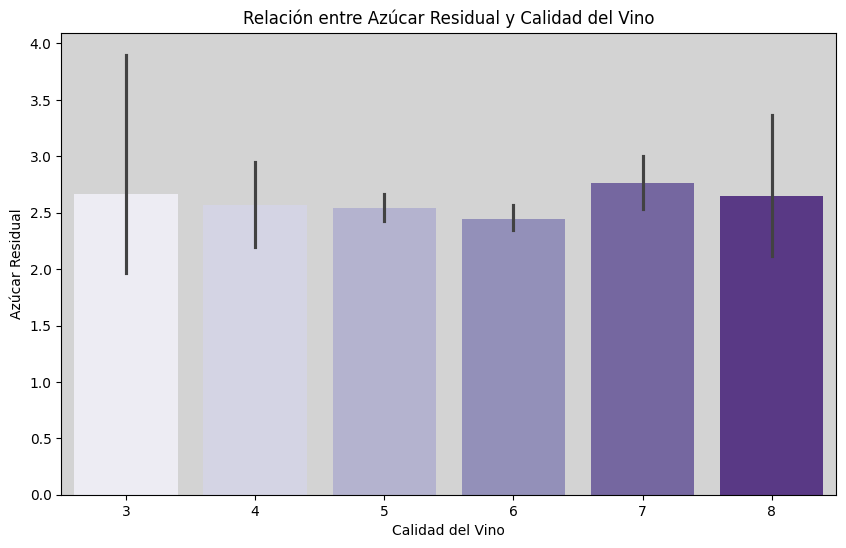

In [11]:
#En este caso, luego de analizar la acidez del vino, me propuse observar la influencia del azucar en la calidad.
#Como vemos, mas allá de la presencia de valores outliers, se mantiene una relativa parcialidad en la presencia
#del azucar residual en las distintas calidades del data set.

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('lightgrey')
barplot = sns.barplot(x='quality', y='residual sugar', data=qw, palette='Purples')
plt.xlabel('Calidad del Vino')
plt.ylabel('Azúcar Residual')
plt.title('Relación entre Azúcar Residual y Calidad del Vino')
plt.show()

In [14]:
#Habiendo observado la distribución a partir de mis preguntas de investigación, comienzo a indagar al dataframe de forma estadística.

qw.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Id
count,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00,1138.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.85,3.31,0.66,10.44,5.65,802.22
std,1.74,0.18,0.20,1.36,0.05,10.25,32.79,0.16,0.17,1.08,0.81,463.14
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,3.21,0.55,9.50,5.00,409.25
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,3.31,0.62,10.20,6.00,791.50
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,3.40,0.73,11.10,6.00,1205.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,4.01,2.00,14.90,8.00,1597.00


In [18]:
#Primero, saber si la cantidad de valores en la calidad del vino se corresponde, es coherente, con su mediana y media.

mean = qw.quality.mean()
median = qw.quality.median()

print("La media de la calidad del vino es:", mean)
print("La mediana de la calidad del vino es:", median)


La media de la calidad del vino es: 5.654657293497364
La mediana de la calidad del vino es: 6.0


In [24]:
#Atendiendo el histograma realizado anteriormente, analizando la frecuencia con la que aparecen los calidades de los vinos, vamos a ralizar
#un análisis del coeficiente de variación de mi columna Quality.

desv_std = (qw.quality.std())/(qw.quality.mean())*100
print("El coeficiente de variación de la columna Quality es:", desv_std)

#Entendiendo que es menor al 30%, la media es representativa. Además, con los calculos realizados anteriormente, vemos la cercania numerica entre la Media y la Mediana.


El coeficiente de variación de la columna Quality es: 14.25995155211733
